## Aufgabe a: Lage- und Streuungsmaße

Die Merkmale temp und atemp sind sich hinsichtlich Lage (Mittelwert ~0.49) und Streuung (Standardabweichung ~0.18 bzw. ~0.16) am ähnlichsten, während casual und registered mit deutlich unterschiedlicher Streuung und Mittelwert die größten Unterschiede zeigen. Da die Merkmale unterschiedliche Skalen und Verteilungen aufweisen (z. B. windspeed vs. cnt), ist eine Standardisierung sinnvoll, um faire Vergleiche und stabile Regressionsmodelle zu ermöglichen.

In [23]:
import pandas as pd

df = pd.read_csv('../data/day.csv')

df.head()

df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

## Aufgabe b: Visualisierung der standardisierten Merkmale

In den Boxplots sieht man deutlich, dass die Merkmale in den Originaldaten sehr unterschiedliche Wertebereiche haben, während nach der Standardisierung alle Merkmale vergleichbare Skalen und Verteilungen um den Mittelwert 0 aufweisen. Dadurch wird deutlich, dass die Standardisierung nötig ist, um Verzerrungen durch unterschiedlich skalierte Features zu vermeiden.

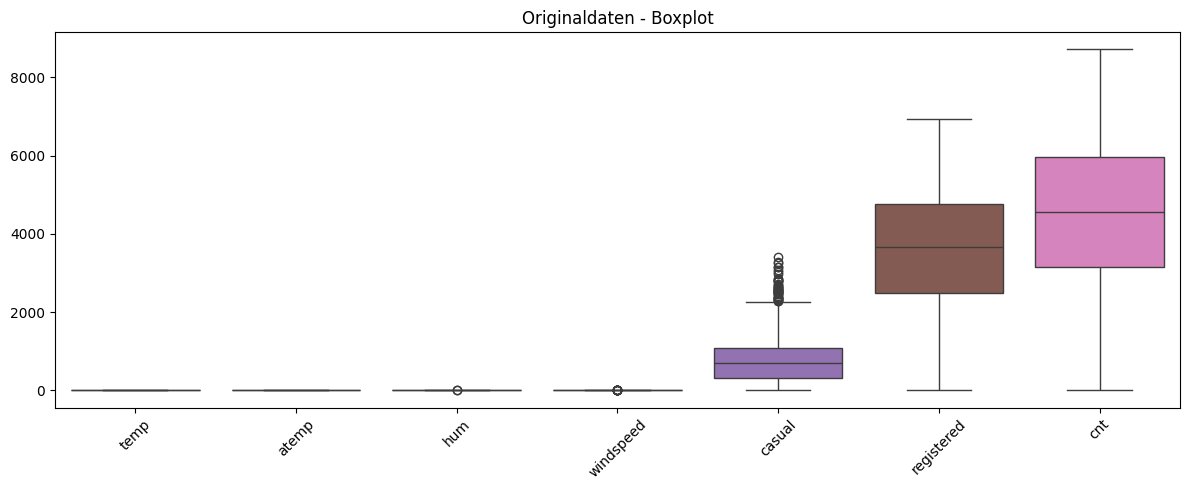

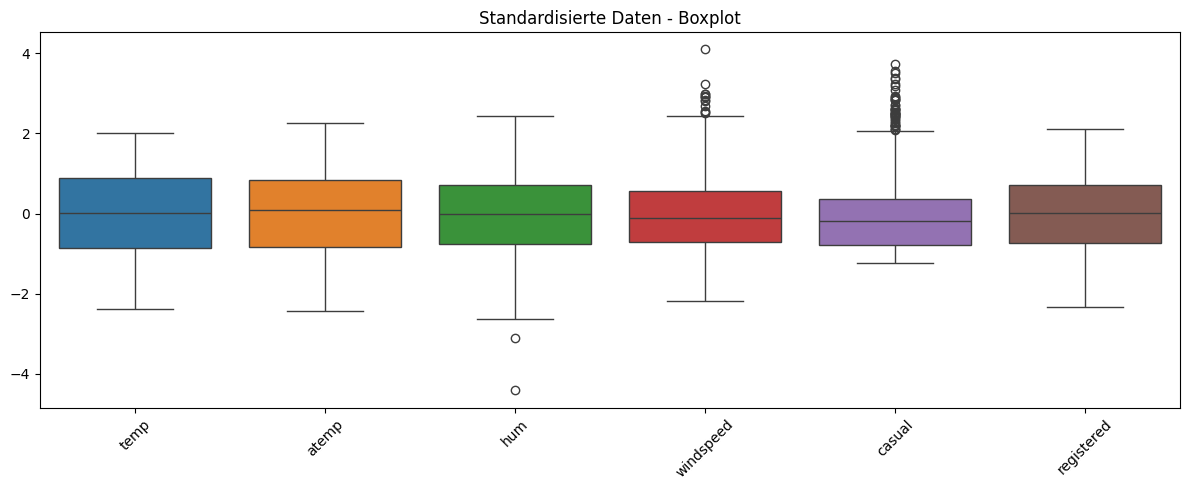

R2-Score: 1.0


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



df = pd.read_csv('../data/day.csv')


y = df['cnt']

X = df.drop(columns=['cnt', 'dteday', 'instant'])  
X = X.select_dtypes(include=['int64', 'float64']) 


plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.title("Originaldaten - Boxplot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(12, 5))
sns.boxplot(data=scaled_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']])
plt.title("Standardisierte Daten - Boxplot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2-Score:", r2)

## Aufgabe c: Visualisierung von Zusammenhängen mit der Zielvariablen

In der Streudiagramm-Übersicht sieht man, dass temp und atemp einen klar erkennbaren linearen Zusammenhang mit der Zielvariable cnt zeigen, während Merkmale wie holiday, weekday oder weathersit eher unregelmäßig verteilt sind und daher vermutlich wenig zur Vorhersage beitragen.

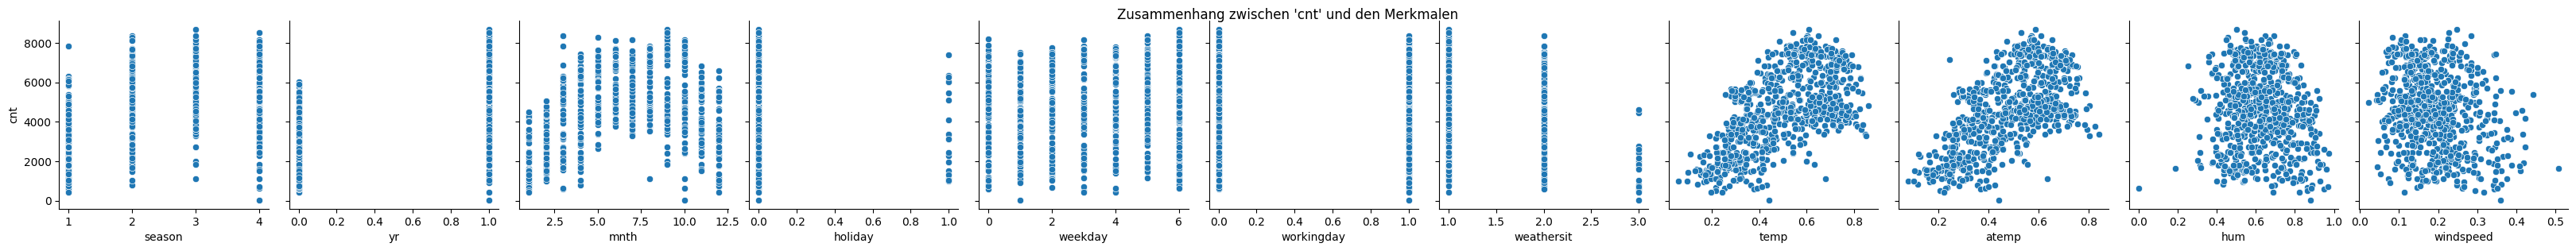

cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/day.csv')

excluded = ['casual', 'registered', 'instant', 'cnt', 'dteday']
features = [col for col in df.columns if col not in excluded]
numeric_features = df[features].select_dtypes(include='number').columns.tolist()

sns.pairplot(df[numeric_features + ['cnt']], y_vars=['cnt'], x_vars=numeric_features, height=3, aspect=1)
plt.suptitle("Zusammenhang zwischen 'cnt' und den Merkmalen", y=1.02)
plt.show()

corr = df[numeric_features + ['cnt']].corr()
print(corr['cnt'].sort_values(ascending=False))

## Aufgabe d: Korrelationsanalyse

Die stärkste positive Korrelation mit cnt hat das Merkmal registered (r ≈ 0.95), was zeigt, dass registrierte Nutzer ein sehr guter Indikator für die Gesamtanzahl der Ausleihungen sind. Negative Korrelationen wie bei weathersit und windspeed deuten darauf hin, dass schlechtes Wetter und hoher Wind tendenziell zu weniger Fahrten führen.

In [19]:
import pandas as pd


df = pd.read_csv('../data/day.csv')

corr = df.corr(numeric_only=True)

print(corr['cnt'].sort_values(ascending=False))

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


## Aufgabe e: Multivariate lineare Regression


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('../data/day.csv')


y = df['cnt']

df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

X = df.drop('cnt', axis=1)

X = pd.get_dummies(X, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

r2 = r2_score(y, y_pred)
print("R²-Wert:", r2)

R²-Wert: 0.8483678329823122


## Aufgabe f: Modellgüte bei wachsendem Trainingsdatensatz

Der Plot zeigt, dass die Modellgüte mit wachsender Trainingsdatengröße insgesamt leicht zunimmt, aber bei 40 % Trainingsdaten bereits ein sehr guter R²-Wert erreicht wird – mehr Daten führen nicht zwingend zu deutlich besseren Ergebnissen. Ich würde daher ein Modell mit mindestens 40 % Trainingsdaten empfehlen, da es effizient und gleichzeitig leistungsstark ist.

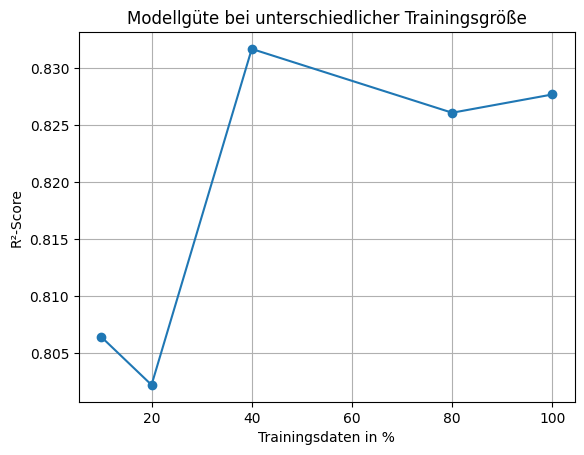

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/day.csv")
df = df.drop(columns=["instant", "dteday", "casual", "registered"])
df = pd.get_dummies(df, drop_first=True)

X = df.drop("cnt", axis=1)
y = df["cnt"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

train_sizes = [0.1, 0.2, 0.4, 0.8, 1.0]
r2_scores = []
random_state = 42
np.random.seed(random_state)

n_total = len(X_train_full)
indices = np.random.permutation(n_total)

for size in train_sizes:
    n_samples = int(size * n_total)
    selected_idx = indices[:n_samples]
    X_sub = X_train_full[selected_idx]
    y_sub = y_train_full.iloc[selected_idx]
    model = LinearRegression()
    model.fit(X_sub, y_sub)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

plt.plot([int(s * 100) for s in train_sizes], r2_scores, marker='o')
plt.xlabel("Trainingsdaten in %")
plt.ylabel("R²-Score")
plt.title("Modellgüte bei unterschiedlicher Trainingsgröße")
plt.grid(True)
plt.show()

## Aufgabe g: Polynomialregression

Beurteilung:

Das R² steigt mit zunehmender Modellordnung leicht an.
Modell 1. Ordnung zeigt Underfitting, da es die Daten nicht gut abbildet.
Modell 3. Ordnung beginnt in Richtung Overfitting zu gehen, bringt jedoch noch einen leichten Zugewinn.
Modell 2. Ordnung bietet einen guten Kompromiss aus Komplexität und Leistung.

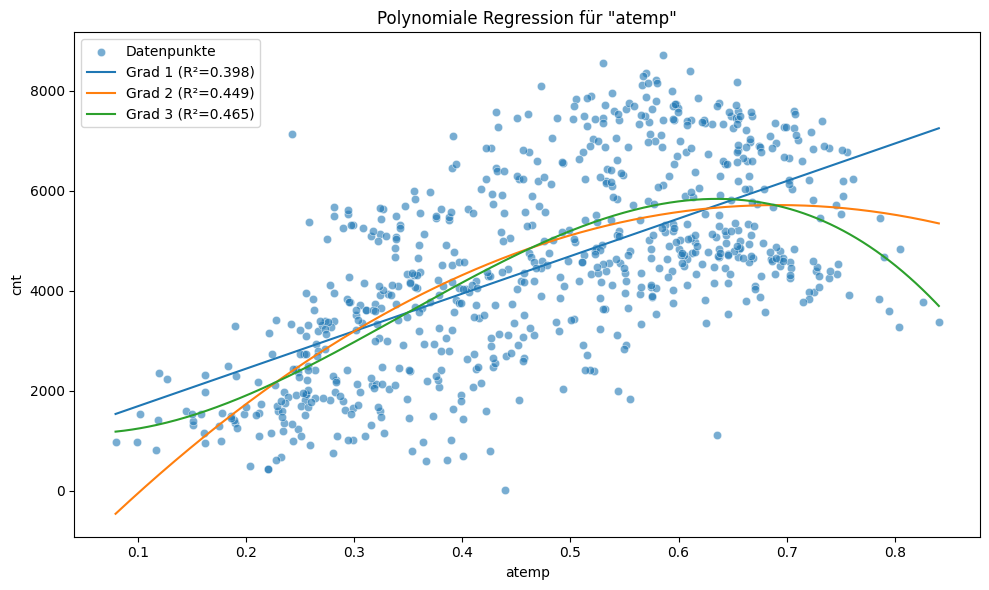

{1: 0.39824391752613697, 2: 0.44890271843054275, 3: 0.46486832586308735}

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_csv("../data/day.csv")

df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
X = df.drop(columns=['cnt'])
y = df['cnt']

correlations = df.corr(numeric_only=True)['cnt'].drop('cnt')
strongest_feature = correlations.abs().idxmax()

x_poly = X[[strongest_feature]].values
x_range = np.linspace(x_poly.min(), x_poly.max(), 500).reshape(-1, 1)
r2_scores = {}

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[strongest_feature], y=y, alpha=0.6, label='Datenpunkte')

for degree in range(1, 4):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x_poly)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    r2_scores[degree] = r2

    x_plot_poly = poly.transform(x_range)
    y_plot = model.predict(x_plot_poly)
    plt.plot(x_range, y_plot, label=f'Grad {degree} (R²={r2:.3f})')

plt.title(f'Polynomiale Regression für \"{strongest_feature}\"')
plt.xlabel(strongest_feature)
plt.ylabel('cnt')
plt.legend()
plt.tight_layout()
plt.show()

r2_scores


## Aufgabe h: Regressionsproblem als Klassifikationsproblem

Das logistische Regressionsmodell erreicht eine Genauigkeit von ca. 88 % auf den Trainingsdaten und 86 % auf den Testdaten, was auf eine gute Generalisierbarkeit hinweist. Für noch bessere Ergebnisse könnte man weitere Merkmale einbeziehen oder Hyperparameter optimieren.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("../data/day.csv")

df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
X = df.drop(columns=['cnt'])
y = df['cnt']

median_cnt = y.median()
y_class = (y >= median_cnt).astype(int)

# Aufteilen in Trainings- und Testdaten (2/3 Training, 1/3 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.33, random_state=42)

log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)

train_preds = log_model.predict(X_train)
test_preds = log_model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

train_acc, test_acc


(0.8813905930470347, 0.859504132231405)